In [11]:
import torch
import torchaudio
import pyttsx3
import matplotlib.pyplot as plt
import whisper
import nemo.collections.asr as nemo_asr
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC, HubertForCTC
from jiwer import wer, mer, wil
import sounddevice as sd
import numpy as np
import wave
import os

In [12]:
jasper_model = nemo_asr.models.EncDecCTCModel.from_pretrained(model_name="stt_en_jasper10x5dr")
quartz_model = nemo_asr.models.EncDecCTCModel.from_pretrained(model_name="stt_en_quartznet15x5")
wav_processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
wav_model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")
hubert_processor = Wav2Vec2Processor.from_pretrained("facebook/hubert-large-ls960-ft")
hubert_model = HubertForCTC.from_pretrained("facebook/hubert-large-ls960-ft")
whisper_model = whisper.load_model("base")

[NeMo I 2024-11-13 15:34:51 nemo_logging:381] Found existing object C:\Users\ASUS\.cache\torch\NeMo\NeMo_1.21.0\stt_en_jasper10x5dr\856ae08d5c4bd78b5e27f696e96f7aab\stt_en_jasper10x5dr.nemo.
[NeMo I 2024-11-13 15:34:51 nemo_logging:381] Re-using file from: C:\Users\ASUS\.cache\torch\NeMo\NeMo_1.21.0\stt_en_jasper10x5dr\856ae08d5c4bd78b5e27f696e96f7aab\stt_en_jasper10x5dr.nemo
[NeMo I 2024-11-13 15:34:51 nemo_logging:381] Instantiating model from pre-trained checkpoint


[NeMo W 2024-11-13 15:35:02 nemo_logging:393] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /data2/voices/train_1k.json
    sample_rate: 16000
    labels:
    - ' '
    - a
    - b
    - c
    - d
    - e
    - f
    - g
    - h
    - i
    - j
    - k
    - l
    - m
    - 'n'
    - o
    - p
    - q
    - r
    - s
    - t
    - u
    - v
    - w
    - x
    - 'y'
    - z
    - ''''
    batch_size: 32
    trim_silence: true
    max_duration: 16.7
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    
[NeMo W 2024-11-13 15:35:02 nemo_logging:393] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    manifest_filepath:

[NeMo I 2024-11-13 15:35:02 nemo_logging:381] PADDING: 16
[NeMo I 2024-11-13 15:35:13 nemo_logging:381] Model EncDecCTCModel was successfully restored from C:\Users\ASUS\.cache\torch\NeMo\NeMo_1.21.0\stt_en_jasper10x5dr\856ae08d5c4bd78b5e27f696e96f7aab\stt_en_jasper10x5dr.nemo.
[NeMo I 2024-11-13 15:35:13 nemo_logging:381] Found existing object C:\Users\ASUS\.cache\torch\NeMo\NeMo_1.21.0\stt_en_quartznet15x5\16661021d16e679bdfd97a2a03944c49\stt_en_quartznet15x5.nemo.
[NeMo I 2024-11-13 15:35:13 nemo_logging:381] Re-using file from: C:\Users\ASUS\.cache\torch\NeMo\NeMo_1.21.0\stt_en_quartznet15x5\16661021d16e679bdfd97a2a03944c49\stt_en_quartznet15x5.nemo
[NeMo I 2024-11-13 15:35:13 nemo_logging:381] Instantiating model from pre-trained checkpoint


[NeMo W 2024-11-13 15:35:14 nemo_logging:393] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /data2/voices/train_1k.json
    sample_rate: 16000
    labels:
    - ' '
    - a
    - b
    - c
    - d
    - e
    - f
    - g
    - h
    - i
    - j
    - k
    - l
    - m
    - 'n'
    - o
    - p
    - q
    - r
    - s
    - t
    - u
    - v
    - w
    - x
    - 'y'
    - z
    - ''''
    batch_size: 32
    trim_silence: true
    max_duration: 16.7
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: /asr_set_1.2/train/train_{0..1023}.tar
    num_workers: 20
    
[NeMo W 2024-11-13 15:35:14 nemo_logging:393] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loade

[NeMo I 2024-11-13 15:35:14 nemo_logging:381] PADDING: 16
[NeMo I 2024-11-13 15:35:15 nemo_logging:381] Model EncDecCTCModel was successfully restored from C:\Users\ASUS\.cache\torch\NeMo\NeMo_1.21.0\stt_en_quartznet15x5\16661021d16e679bdfd97a2a03944c49\stt_en_quartznet15x5.nemo.


Some weights of the model checkpoint at facebook/wav2vec2-base-960h were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_v', 'wav2vec2.encoder.pos_conv_embed.conv.weight_g']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.masked_spec_embed', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You sho

In [13]:
os.environ["PATH"] += os.pathsep + r"C:\ffmpeg\bin"

In [14]:
def record_audio(duration=5, fs=16000):
    print("Recording...")
    audio = sd.rec(int(duration * fs), samplerate=fs, channels=1, dtype='float32')
    sd.wait()  # Wait until recording is finished
    print("Recording complete.")
    audio = audio.squeeze()
    return audio, fs

In [15]:
def save_audio(audio, fs, filename="temp.wav"):
    audio_int16 = (audio * 32767).astype(np.int16)
    with wave.open(filename, 'w') as wf:
        wf.setnchannels(1)
        wf.setsampwidth(2)
        wf.setframerate(fs)
        wf.writeframes(audio_int16.tobytes())

In [16]:
def setup_tts_engine(error_rate, gender="male"):
    engine = pyttsx3.init()
    voices = engine.getProperty('voices')
    if gender == "female":
        engine.setProperty('voice', voices[1].id)
    else:
        engine.setProperty('voice', voices[0].id)
    
    # Pronunciation improvement tips
    if error_rate > 0.5:
        tips = "Try to speak more clearly and pronounce each word distinctly."
    elif error_rate > 0.3:
        tips = "Focus on enunciating words carefully to reduce misinterpretation."
    else:
        tips = "Good pronunciation! Keep practicing for even better clarity."
    
    message = f"The word error rate is {error_rate:.2f}. {tips}"
    engine.say(message)
    engine.runAndWait()

In [19]:
def visualize_pronunciation(ground_truth, prediction, model_name):
    ground_truth_words = ground_truth.split()
    predicted_words = prediction.split()
    
    fig, ax = plt.subplots()
    for idx, word in enumerate(ground_truth_words):
        color = 'green' if idx < len(predicted_words) and word.lower() == predicted_words[idx].lower() else 'red'
        ax.text(idx * 0.1, 0.5, word, color=color, fontsize=12, ha='center')
    ax.axis('off')
    ax.set_title(f'{model_name} Model')
    plt.show()

In [20]:
def transcribe_and_evaluate(audio_data, sample_rate, transcription):
    # Resample and save audio
    waveform = torch.from_numpy(audio_data).float()
    if sample_rate != 16000:
        waveform = torchaudio.transforms.Resample(sample_rate, 16000)(waveform)
    temp_audio_path = "temp.wav"
    save_audio(waveform.numpy(), 16000, temp_audio_path)
    
    # Ground truth text
    ground_truth_text = transcription

    # Model predictions
    jasper_pred = jasper_model.transcribe([temp_audio_path])[0]
    quartz_pred = quartz_model.transcribe([temp_audio_path])[0]

    inputs = wav_processor(waveform, sampling_rate=16000, return_tensors="pt", padding=True)
    with torch.no_grad():
        wav2vec_logits = wav_model(inputs.input_values).logits
    wav2vec_pred = wav_processor.batch_decode(torch.argmax(wav2vec_logits, dim=-1))[0]

    inputs = hubert_processor(waveform, sampling_rate=16000, return_tensors="pt")
    with torch.no_grad():
        hubert_logits = hubert_model(inputs.input_values).logits
    hubert_pred = hubert_processor.batch_decode(torch.argmax(hubert_logits, dim=-1))[0]

    whisper_result = whisper_model.transcribe(temp_audio_path)
    whisper_pred = whisper_result['text']

    model_names = ['Jasper', 'QuartzNet', 'Wav2Vec2', 'Hubert', 'Whisper']
    predicted_texts = [jasper_pred, quartz_pred, wav2vec_pred, hubert_pred, whisper_pred]

    # Calculate errors
    word_error_rates, match_error_rates, wil_rates = [], [], []
    for model, pred_text in zip(model_names, predicted_texts):
        word_error = wer(ground_truth_text.lower(), pred_text.lower())
        match_error = mer(ground_truth_text.lower(), pred_text.lower())
        wil_rate = wil(ground_truth_text.lower(), pred_text.lower())
        word_error_rates.append(word_error)
        match_error_rates.append(match_error)
        wil_rates.append(wil_rate)
        
        # Visualize pronunciation for each model
        visualize_pronunciation(ground_truth_text, pred_text, model)

    # Plot errors
    def plot_metrics(metrics, title):
        plt.figure(figsize=(8, 5))
        plt.barh(model_names, metrics, color='skyblue')
        plt.xlim(0, 1)
        plt.title(title)
        plt.xlabel("Error/Loss Rate")
        plt.ylabel("Models")
        for index, value in enumerate(metrics):
            plt.text(value, index, f"{value:.3f}")
        plt.show()

    # Generate plots for each error metric
    plot_metrics(word_error_rates, "Word Error Rates")
    plot_metrics(match_error_rates, "Match Error Rates")
    plot_metrics(wil_rates, "Word Information Loss Rates")

    # Use the model with the highest error rate for TTS feedback
    max_error_rate = max(word_error_rates)
    setup_tts_engine(max_error_rate, gender="female")

Recording...
Recording complete.


Transcribing: 100%|██████████| 1/1 [00:00<00:00,  1.52it/s]


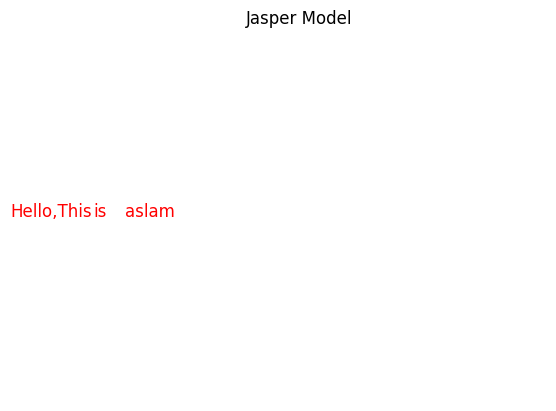

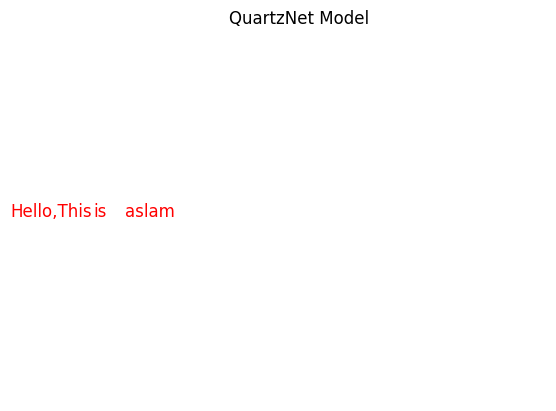

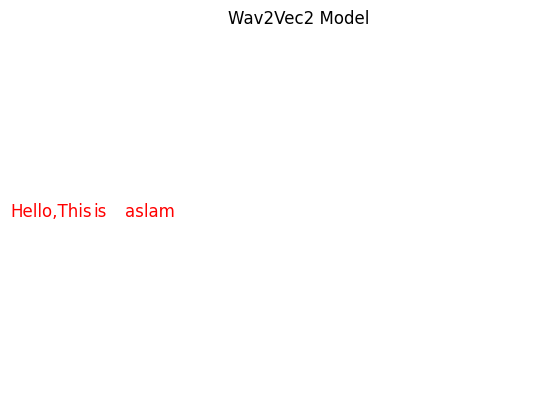

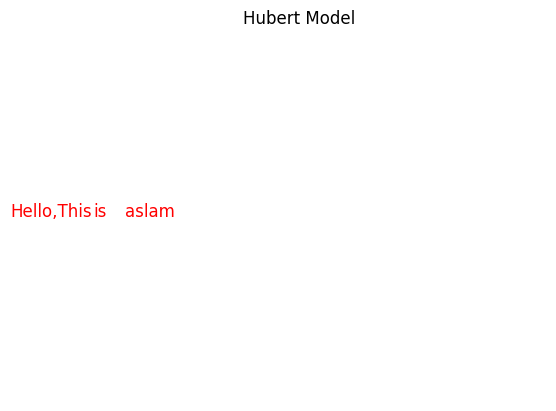

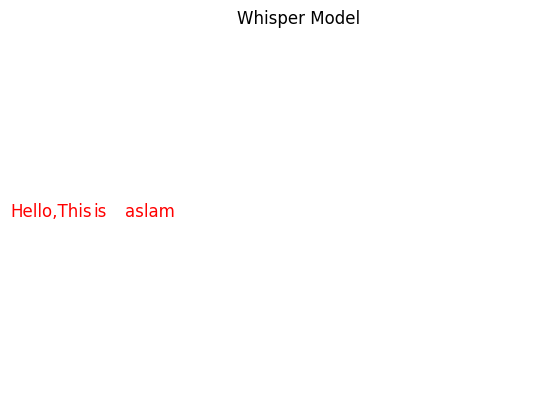

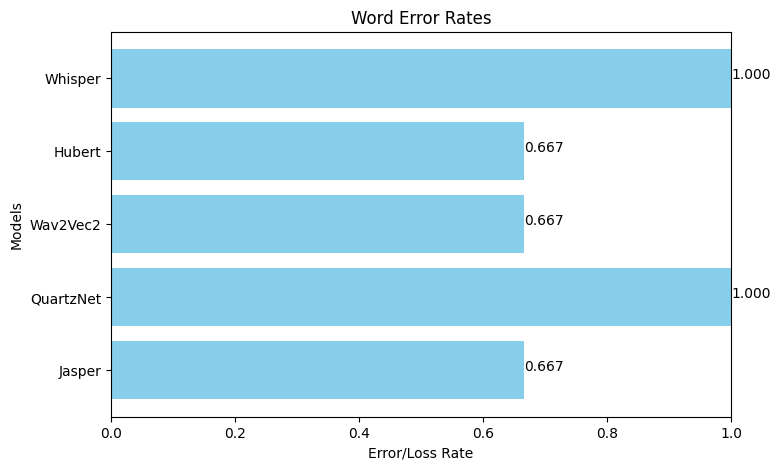

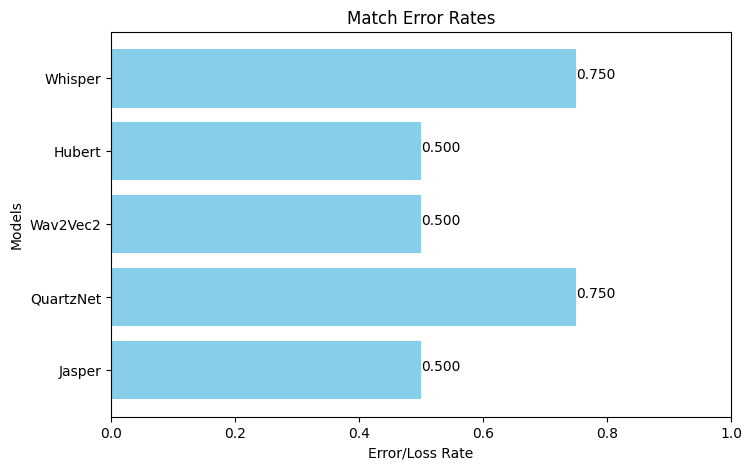

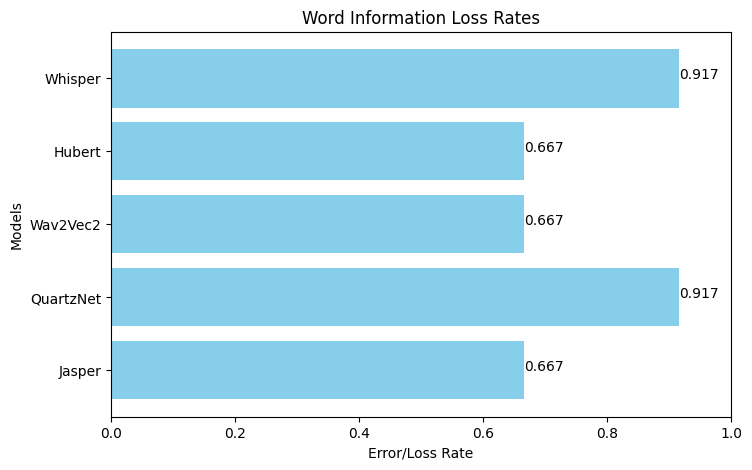

In [21]:
duration = 5  # Record for 5 seconds
transcription = input("Enter Transcription")  # Replace with desired transcription text

audio_data, fs = record_audio(duration)
transcribe_and_evaluate(audio_data, fs, transcription)